# Introduction to the imbd movies dataset

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

-Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

-The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,           accounting for inflation over time.

-original_title>> the title of movie

-net_profit>>it is the profit gained(revenue_adj-budget_adj)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Data Wrangling

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df =pd.read_csv("tmdb-movies1.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06 09 15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04 01 15,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
#shape of the dataframe
df.shape

(10866, 21)

In [4]:
#statistics over the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#data types in each column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
#invistigate for any null values in dataset columns
df.isnull().any(axis=0)

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
#search for any duplicates 
df.duplicated().sum()

1

# Data Cleaning

There are some columns that do not have infomation do not add anything do the analysis process so they have to be drop

In [9]:
#drop columns that have useless information
cols_drop= ["id","imdb_id","homepage","tagline","budget","revenue","overview","keywords","release_date"]
df.drop(cols_drop,axis=1,inplace=True)
df.shape

(10866, 12)

Drop null values and duplicates

In [10]:
#Drop null values and duplicates
df.drop_duplicates(inplace=True)
df.dropna(inplace =True)
df.shape

(9772, 12)

Creating a net profit column from budget_adj & revenue_adj as these to columns calculate the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [11]:
df["net_profit"] = df['revenue_adj'] - df['budget_adj']
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09


cleaning columns that contain "|" in cast , genres and production_companies

In [12]:
cols = ["cast","genres", "production_companies"]
for c in cols:
    df[c] = df[c].apply(lambda x : x.split("|"))
df.head(3)

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2480,6.3,2015,101199955.5,2.716190e+08,1.704191e+08


# Research Question 1 (Which genres are the most popular?)

First ,exploring with visuals

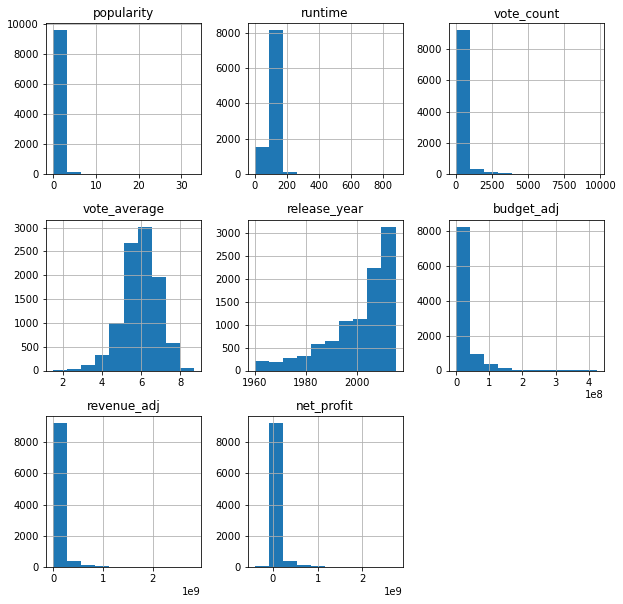

In [13]:
df.hist(figsize=(10,10));

Genres column have multiple genres for each value, so I will explode the genres column to make each movie type in one row

In [14]:
#first make a copy of the orignal dataframe 
df_c = df.copy()
#then explode genres column
df_c = df_c.explode("genres")
df_c.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,Action,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,Adventure,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,Science Fiction,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,Thriller,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,Action,"[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08


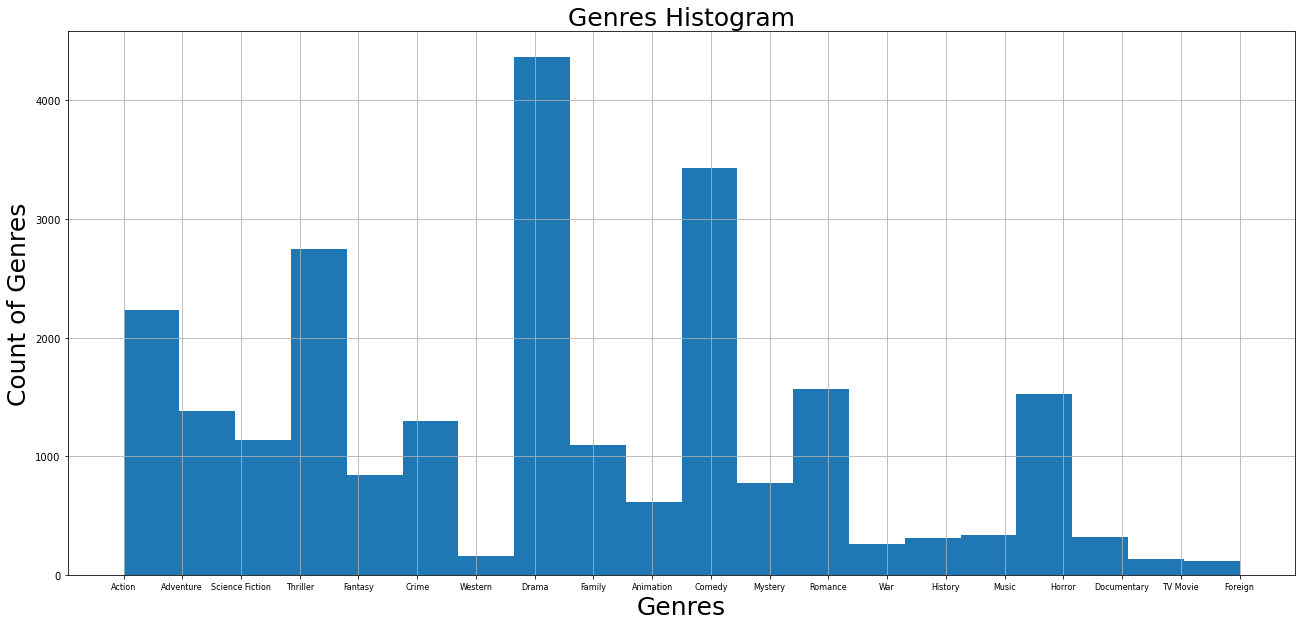

In [22]:
df_c["genres"].hist(figsize=(22,10),bins=20,xlabelsize=8);
plt.xlabel("Genres",fontsize =25);
plt.ylabel("Count of Genres",fontsize =25)
plt.title("Genres Histogram",fontsize =25);

so we can conclude that, drama Movies are the most frequent type while Documentary are the least.

# Research Question 2 (Which genres are most popular from year to year?)

In [24]:
#print the most popular genre in each year with plot genre popularity in each year
years_list = sorted(df_c["release_year"].unique())
for year in years_list:
    df1 = df_c[df_c["release_year"]==year]
    df2 = df1[df1["popularity"]==df1["popularity"].max()]
    w = list(df2["genres"][0:])
    print("The most popular genre in {} is {}.".format(year,w))

The most popular genre in 1960 is ['Drama', 'Horror', 'Thriller'].
The most popular genre in 1961 is ['Adventure', 'Animation', 'Comedy', 'Family'].
The most popular genre in 1962 is ['Adventure', 'Action', 'Thriller'].
The most popular genre in 1963 is ['Action', 'Thriller', 'Adventure'].
The most popular genre in 1964 is ['Adventure', 'Action', 'Thriller'].
The most popular genre in 1965 is ['Adventure', 'Action', 'Thriller'].
The most popular genre in 1966 is ['Animation', 'Family', 'Comedy'].
The most popular genre in 1967 is ['Family', 'Animation', 'Adventure'].
The most popular genre in 1968 is ['Science Fiction', 'Mystery', 'Adventure'].
The most popular genre in 1969 is ['Adventure', 'Action', 'Thriller'].
The most popular genre in 1970 is ['Animation', 'Comedy', 'Family', 'Adventure'].
The most popular genre in 1971 is ['Science Fiction', 'Drama'].
The most popular genre in 1972 is ['Drama', 'Crime'].
The most popular genre in 1973 is ['Animation', 'Family'].
The most popular 

In [26]:
#visualize each year genres popularity
'''
for year in years_list:
    #plot  genre popularity in each year
    x=df_c[df_c["release_year"]==year]["genres"].unique()
    y=df_c[df_c["release_year"]==year]["genres"].value_counts()
    f, ax = plt.subplots(figsize=(20,5));
    plt.bar(x,y);
    plt.title(year)
    plt.xlabel("Genres")
    plt.rc('xtick',labelsize=10)
'''

'\nfor year in years_list:\n    #plot  genre popularity in each year\n    x=df_c[df_c["release_year"]==year]["genres"].unique()\n    y=df_c[df_c["release_year"]==year]["genres"].value_counts()\n    f, ax = plt.subplots(figsize=(20,5));\n    plt.bar(x,y);\n    plt.title(year)\n    plt.xlabel("Genres")\n    plt.rc(\'xtick\',labelsize=10)\n'

Shwoing some statistics for eah genre 

In [29]:
df_c.groupby(["genres"]).mean()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
genres,,,,,,,,
Action,0.968256,105.516331,417.643400,5.796823,1999.875168,3.500696e+07,9.781054e+07,6.280359e+07
Adventure,1.209053,106.294075,543.687861,5.951951,1999.216040,4.659343e+07,1.504634e+08,1.038700e+08
Animation,0.914281,70.871961,339.369530,6.387358,2004.136143,2.856795e+07,9.648818e+07,6.792023e+07
Comedy,0.631565,97.361200,192.646665,5.894553,2000.443635,1.751002e+07,5.285240e+07,3.534238e+07
Crime,0.767337,107.026944,289.638953,6.128637,1999.237105,2.236703e+07,5.902647e+07,3.665945e+07
Documentary,0.217167,101.911672,43.968454,6.930915,2008.097792,9.001120e+05,3.510897e+06,2.610785e+06
Drama,0.625878,110.890926,197.187672,6.178391,2000.526123,1.611420e+07,4.402312e+07,2.790891e+07
Family,0.846467,89.710502,302.833790,6.002557,2000.562557,3.009340e+07,9.844916e+07,6.835576e+07
Fantasy,1.056310,100.853571,456.454762,5.884524,2000.189286,4.075680e+07,1.212249e+08,8.046808e+07


Accroding to this statistic we can conclude that:

1- Adventure movies is the most popular genre and highest net profit

2- Documentary movies is the least popular 

3- History has the longest runtime period and Animation is the shortest

4- Foreign movies revenues do not cover its budget 

# Research Question 3 (Which production company earned the highest net profit from year to year)

In [33]:
df_c2 =df.copy()
df_c2 = df_c2.explode("production_companies")
df_c2.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09


In [34]:
companyies_list = df_c2["production_companies"].unique()
for year in years_list:
    df1 = df_c2[df_c2['release_year']==year]
    df2 = df1[df1["net_profit"]==df1["net_profit"].max()]
    e = list(df2["production_companies"])
    print("Company/s that earned the highest net profit in {}s is/are {}.".format(year,e))

Company/s that earned the highest net profit in 1960s is/are ['Bryna Productions'].
Company/s that earned the highest net profit in 1961s is/are ['Walt Disney Productions'].
Company/s that earned the highest net profit in 1962s is/are ['Eon Productions', 'Metro-Goldwyn-Mayer (MGM)'].
Company/s that earned the highest net profit in 1963s is/are ['Eon Productions', 'Metro-Goldwyn-Mayer (MGM)', 'Danjaq'].
Company/s that earned the highest net profit in 1964s is/are ['Eon Productions', 'Metro-Goldwyn-Mayer (MGM)'].
Company/s that earned the highest net profit in 1965s is/are ['Robert Wise Productions', 'Argyle Enterprises'].
Company/s that earned the highest net profit in 1966s is/are ['Chenault Productions'].
Company/s that earned the highest net profit in 1967s is/are ['Walt Disney Pictures'].
Company/s that earned the highest net profit in 1968s is/are ['Stanley Kubrick Productions', 'Metro-Goldwyn-Mayer (MGM)'].
Company/s that earned the highest net profit in 1969s is/are ['Twentieth C

# Question 4 (Which movies have earned the highest and the lowest net profit?)

In [35]:
df[df["net_profit"]== df["net_profit"].max()].original_title

1329    Star Wars
Name: original_title, dtype: object

In [38]:
df[df["net_profit"]== df["net_profit"].min()].original_title

2244    The Warrior's Way
Name: original_title, dtype: object

# Question 5 (At which year more movies released?)

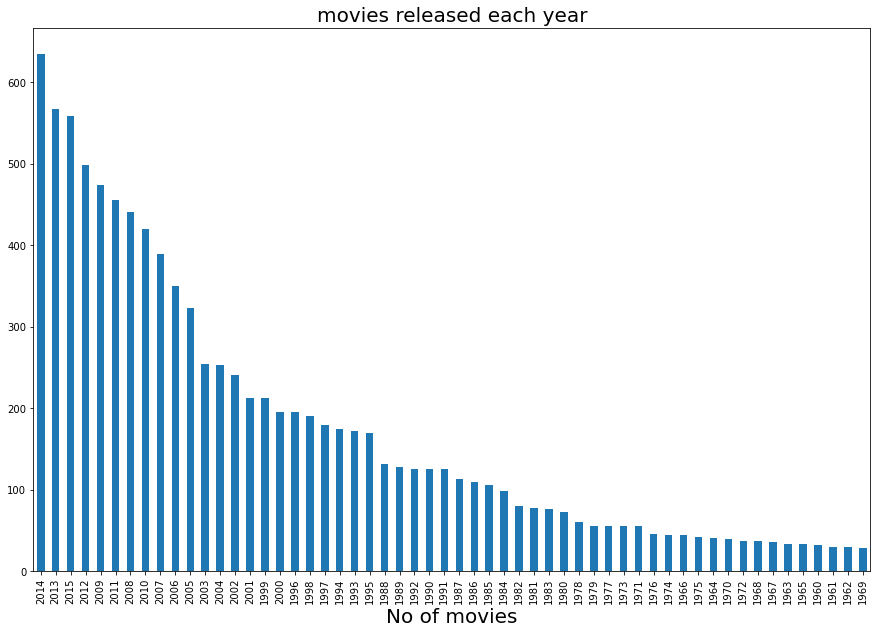

In [39]:
df["release_year"].value_counts().plot(kind='bar',figsize=(15,10))
plt.title("movies released each year",fontsize=20);
plt.xlabel("Year",fontsize=20);
plt.xlabel("No of movies",fontsize=20);

# Question 6 (Do movies with high vote average always guarantee higher profits?)

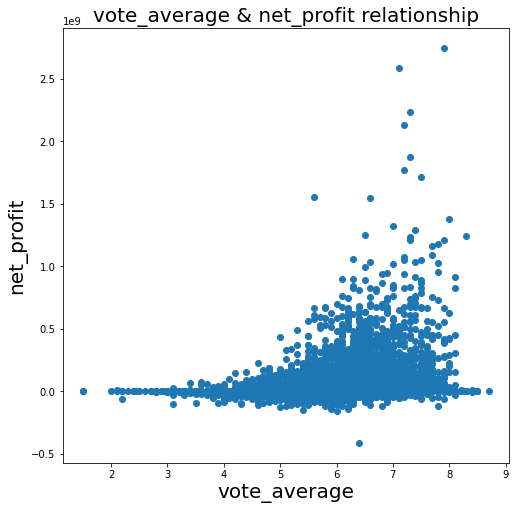

In [41]:
x = df["vote_average"]
y = df["net_profit"]
_, ax = plt.subplots(figsize=(8,8));
plt.scatter(x,y);
plt.xlabel("vote_average",fontsize=20);
plt.ylabel("net_profit",fontsize=20);
plt.title("vote_average & net_profit relationship",fontsize=20);

Although movies that earned higher profits have average vote over 6 , but this is not always true as some movies with a quiet high average vote did not cover its budget and lost money

# Conclusions

Star wars is the most profitable movie while the warrior's way is the least.

Drama Movies are the most frequent type while western are the least.

historical movies are the longest while animations are the shortes.

Adventure movies are the most profitable while foreign movies are the least.

Adventure movies are the most popular while documentary are the least.

in 2014 most number of movies released.

Universal Pictures is the most common production company


Most movies covered its budget